## **Parallel processing performance**

Change root directory

In [2]:
import os
os.chdir('/home/iaapp/brayan/helmholtzSim')
print(os.getcwd())

/home/iaapp/brayan/helmholtzSim


Import Libraries

In [3]:
import numpy as np
import pandas as pd
import time
from src import helmCoils_simulator as test_3
from src import plotMagneticField as hplot
import matplotlib.pyplot as plt

Simulation Settings

In [4]:
# Initialize coil parameters
X_coil = test_3.CoilParameters(1.05, 0.59, 30)
# Current coil simulation
I = np.array([1,1,1])
Ax = np.eye(3)

# X coil simulation
grid_length_size = 0.05
num_seg = 100

Spawn Helmholtz coils spires

In [5]:
##Spawn spires
spire1_x_s, spire2_x_s = test_3.square_spires(Ax, X_coil.h, X_coil.a, num_seg)

f0 = None
f0 = hplot.plot_spires(f0, spire1_x_s, spire2_x_s, color='black', row=None, col=None)

# Plot the square spires
f0.show()

Spawn simulation Grid

In [6]:
# Spawn Grid# Generar grid
X, Y, Z = test_3.generate_range(X_coil.a*3/4, grid_length_size)

hplot.plot_grid(X, Y, Z, f0)

Simulation with variable parallel_coils and batch_size

In [7]:
# Initialize a list to store the execution times for different n_spires and points
execution_times = []

# Iniciar simulación
for n_spires in range(1, 5):
    print ('n_spires: ', n_spires)
    
    for points in range(1, 150):
        start_time = time.time()
        # Run the simulation
        x_coil_results_s = test_3.coil_simulation_1d_sequential(X, Y, Z, X_coil, I[0], spire1_x_s, spire2_x_s, n_spires, points, False)
        # Mark the end time
        end_time = time.time()
        # Calculate execution time
        execution_time = end_time - start_time
        # Store the results in the list
        execution_times.append([n_spires, points, execution_time])

# Create a pandas DataFrame
df = pd.DataFrame(execution_times, columns=['n_spires', 'points', 'execution_time'])

# Save the DataFrame to a CSV file
df.to_csv('data/parallel_test.csv', index=False)

print("Execution times have been saved to 'execution_times.csv'.")
    

n_spires:  1


n_spires:  2
n_spires:  3
n_spires:  4
Execution times have been saved to 'execution_times.csv'.


Plot obtained results

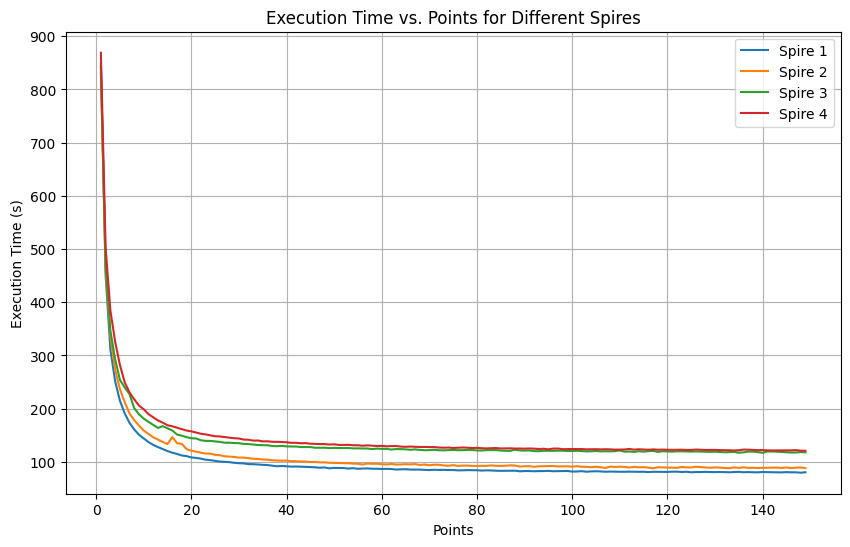

In [9]:
# Plotting
plt.figure(figsize=(10, 6))
for n in df['n_spires'].unique():
    subset = df[df['n_spires'] == n]
    plt.plot(subset['points'], subset['execution_time'], label=f"Spire {n}")

plt.title("Execution Time vs. Points for Different Spires")
plt.xlabel("Points")
plt.ylabel("Execution Time (s)")
plt.legend()
plt.grid(True)
plt.show()